# 1. 데이터 불러오기

In [1]:
import os
os.chdir('C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/data')

In [2]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

# 2. Train Test 안나눈 RNN

In [40]:
import tensorflow as tf
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 6])
X.shape

TensorShape([3125, 600, 6])

In [41]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

In [42]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_12 (SimpleRNN)    (None, 32)                1248      
_________________________________________________________________
dense_20 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_21 (Dense)             (None, 61)                7869      
Total params: 13,341
Trainable params: 13,341
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(X,y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 2s 75ms/step - loss: 3.9674 - accuracy: 0.0977 - val_loss: 3.2683 - val_accuracy: 0.4928
Epoch 2/30
20/20 [==============================] - 1s 65ms/step - loss: 3.1045 - accuracy: 0.4789 - val_loss: 2.8246 - val_accuracy: 0.4976
Epoch 3/30
20/20 [==============================] - 1s 68ms/step - loss: 2.7587 - accuracy: 0.4882 - val_loss: 2.7557 - val_accuracy: 0.4976
Epoch 4/30
20/20 [==============================] - 1s 70ms/step - loss: 2.7617 - accuracy: 0.4651 - val_loss: 2.7279 - val_accuracy: 0.4976
Epoch 5/30
20/20 [==============================] - 1s 72ms/step - loss: 2.6912 - accuracy: 0.4764 - val_loss: 2.7034 - val_accuracy: 0.4976
Epoch 6/30
20/20 [==============================] - 1s 71ms/step - loss: 2.6640 - accuracy: 0.4703 - val_loss: 2.6802 - val_accuracy: 0.4976
Epoch 7/30
20/20 [==============================] - 1s 72ms/step - loss: 2.6063 - accuracy: 0.4773 - val_loss: 2.6572 - val_accuracy: 0.4976
Epoch 8/30
20

In [44]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [45]:
pred=model.predict(test_X)

In [46]:
submission.iloc[:,1:]=pred

In [47]:
# 2는 loss 잘못씀 ㅜㅜ loss = mse 씀 ㅠㅠ
submission.to_csv('C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/data/RNN/2-1.csv', index=False)

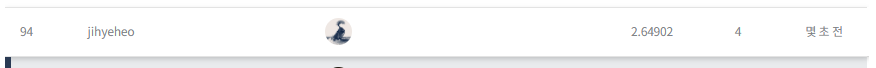

# 3. Train Test 나눈 rnn(너무 안나옴)

In [18]:
X_train = train[(train['id']>= 0) & (train['id']<=2499)]
X_test = train[train['id'] >= 2500]
X_train = tf.reshape(np.array(X_train.iloc[:,2:]),[-1, 600, 6])
X_test = tf.reshape(np.array(X_test.iloc[:,2:]),[-1, 600, 6])

from tensorflow.keras.utils import to_categorical
y =  train_labels['label']
slice_arr = slice(0,2500,1)
y_train = y[slice_arr]

slice_arr2 = slice(2500,3125,1)
y_test = y[slice_arr2]

y_train_encoding = tf.keras.utils.to_categorical(y_train)
y_test_encoding = tf.keras.utils.to_categorical(y_test)

In [28]:
# op= adam,loss mse 했을때 정확도 0 나옴
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61,activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 32)                1248      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_11 (Dense)             (None, 61)                7869      
Total params: 13,341
Trainable params: 13,341
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(X_train,y_train_encoding
          , epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
16/16 [==============================] - 2s 77ms/step - loss: 3.9889 - accuracy: 0.1230 - val_loss: 3.1944 - val_accuracy: 0.4860
Epoch 2/30
16/16 [==============================] - 1s 67ms/step - loss: 3.1181 - accuracy: 0.4698 - val_loss: 2.8322 - val_accuracy: 0.4860
Epoch 3/30
16/16 [==============================] - 1s 70ms/step - loss: 2.7961 - accuracy: 0.4803 - val_loss: 2.7859 - val_accuracy: 0.4860
Epoch 4/30
16/16 [==============================] - 1s 70ms/step - loss: 2.6874 - accuracy: 0.4881 - val_loss: 2.7676 - val_accuracy: 0.4860
Epoch 5/30
16/16 [==============================] - 1s 68ms/step - loss: 2.6467 - accuracy: 0.4861 - val_loss: 2.7496 - val_accuracy: 0.4860
Epoch 6/30
16/16 [==============================] - 1s 75ms/step - loss: 2.6844 - accuracy: 0.4678 - val_loss: 2.7361 - val_accuracy: 0.4860
Epoch 7/30
16/16 [==============================] - 1s 74ms/step - loss: 2.6517 - accuracy: 0.4609 - val_loss: 2.7232 - val_accuracy: 0.4860
Epoch 8/30
16

In [30]:
y_pred = model.predict(X_test)

In [31]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test_encoding)))

테스트 세트의 정확도: 0.00


In [23]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [24]:
prediction=model.predict(test_X)

In [25]:
submission.iloc[:,1:]=prediction

In [26]:
submission.to_csv('C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/data/RNN/3.csv', index=False)

In [33]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(32, input_shape=(600,6)))
model.add(Dense(128, activation='relu'))
model.add(Dense(61,activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_9 (SimpleRNN)     (None, 32)                1248      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_15 (Dense)             (None, 61)                7869      
Total params: 13,341
Trainable params: 13,341
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train,y_train_encoding
          , epochs=30, batch_size=128, validation_split=0.2,verbose=0)

In [35]:
y_pred = model.predict(X_test)

In [36]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test_encoding)))

테스트 세트의 정확도: 0.00
